In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

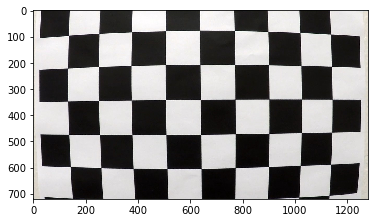

In [2]:
# Read in a calibration image
img = mpimg.imread('./camera_cal/calibration1.jpg')
plt.imshow(img)

In [3]:
import glob
%matplotlib qt5

# Read in and make a list of calibration images
images = glob.glob('./camera_cal/calibration*.jpg')

# Arrays to store object points and image points from all the images
objpoints = [] # 3D points in real world data
imgpoints = [] # 2D points on image plane

# Prepare object points, like (0,0,0),(1,0,0),(2,0,0) ... (7,5,0)
objp = np.zeros((6*8,3),np.float32)
objp[:,:2] = np.mgrid[0:8,0:6].T.reshape(-1,2) #x,y coordinates

for fname in images:
    # read in each image
    img = mpimg.imread(fname)

    # Convert image to grayscale
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray,(8,6),None)

    # If corners found, add object points, image points
    if ret == True:
        imgpoints.append(corners)
        objpoints.append(objp)

        # draw and display the corners
        img =cv2.drawChessboardCorners(img, (8,6),corners,ret)
        plt.imshow(img)
